In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_detached = "detached_apex.csv"

homes_data = pd.read_csv(file_detached)

In [2]:
homes_data.count()

MLS #                    5114
Status                   5114
Address                  5114
City                     5114
Zip                      5114
Closing Date             5114
Subdivision              5114
LvngAreaSF               5114
YrBlt                    5114
Beds                     5114
FBths                    5114
HBths                    5114
Property Type            5114
List Price               5114
Sold Price               5114
Days On Market           5114
HOA Y/N                  4571
Garage                   5114
Acres                    5114
Sold Price/List Price    5114
dtype: int64

In [3]:
homes_df = homes_data.copy()
homes_df = homes_df.rename(columns={"Sold Price": "SoldPrice"})
homes_df = homes_df.rename(columns={"List Price": "ListPrice"})

#remove $
homes_df['SoldPrice'] = homes_df.SoldPrice.str.lstrip('$')
homes_df['ListPrice'] = homes_df.ListPrice.str.lstrip('$')
#remove comma
homes_df['SoldPrice'] = homes_df['SoldPrice'].str.replace(',', '').astype(float)
homes_df['ListPrice'] = homes_df['ListPrice'].str.replace(',', '').astype(float)
homes_df['LvngAreaSF'] = homes_df['LvngAreaSF'].str.replace(',', '').astype(int)


In [4]:
homes_df = homes_df[homes_df.SoldPrice > 75000]
homes_df = homes_df[homes_df.SoldPrice < 800000]
homes_df


,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
2,2177583,CLOSED,5524 Bobbitt Road,Apex,27539,5/9/2018,Not in a Subdivision,1083,1953,2,1,0,Detached,75000.0,92000.0,2,No,0,.51-.75 Acres,1.23
3,2194561,CLOSED,106 N Bellhaven Drive,Apex,27539,7/6/2018,Not in a Subdivision,1344,1997,3,2,0,Detached,84500.0,100000.0,16,No,1,.26-.5 Acres,1.18
4,2197718,CLOSED,8325 Rhodes Road,Apex,27603,9/27/2018,Washington Homes,480,1960,2,1,0,Detached,109500.0,105000.0,49,NaN,0,1-2.9 Acres,0.96
5,2228236,CLOSED,304 S Hughes Street,Apex,27502,1/8/2019,Not in a Subdivision,964,1948,1,1,0,Detached,105000.0,105000.0,0,NaN,0,0-.25 Acres,1.00
6,2217507,CLOSED,2700 Optimist Farm Road,Apex,27539-8605,1/18/2019,Not in a Subdivision,1143,1910,2,1,0,Detached,125000.0,110000.0,38,No,0,1-2.9 Acres,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,2152422,CLOSED,1221 Lowland Street,Apex,27523,8/3/2020,Sweetwater,4653,2018,4,5,0,Detached,797500.0,797500.0,11,Yes,2,.26-.5 Acres,1.00
4908,2294624,CLOSED,1831 Old Evergreen Drive,Apex,27502,7/13/2020,Stillwater,3842,2020,4,4,1,Detached,799155.0,799155.0,0,Yes,3,.26-.5 Acres,1.00
4909,2190515,CLOSED,3138 Curling Creek Drive,Apex,27502,3/29/2019,Stillwater,4261,2018,5,5,1,Detached,799750.0,799750.0,0,Yes,3,.26-.5 Acres,1.00
4910,2149293,CLOSED,2080 Vandiver Way,Apex,27523,3/11/2019,Providence at Yates Pond,4373,2017,5,4,1,Detached,799900.0,799900.0,0,Yes,3,.26-.5 Acres,1.00


In [5]:
#randomize data frames
random_homes_df = homes_df.sample(frac=1)
random_homes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
89,2237203,CLOSED,2005 Englewood Drive,Apex,27539,4/25/2019,Englewood Forest,1228,1982,3,2,0,Detached,225000.0,212000.0,13,No,1,.26-.5 Acres,0.94
2191,2178247,CLOSED,3729 Sunlake Farms Road,Apex,27539,12/17/2018,Sunlake Farms,3037,1995,3,2,1,Detached,470000.0,407000.0,242,NaN,4,.76-.99 Acres,0.87
3614,2325850,CLOSED,1900 Park Stream Court,Apex,27502,7/27/2020,Stillwater,3299,2016,5,4,0,Detached,512900.0,513100.0,0,Yes,3,0-.25 Acres,1.00
3506,2191300,CLOSED,3040 Sainsbury Way,Apex,27502,7/20/2018,Saddlebrook,2659,2017,4,3,0,Detached,504493.0,504493.0,0,Yes,2,0-.25 Acres,1.00
2900,2192096,CLOSED,6013 Larboard Drive,Apex,27539,6/29/2018,The Park At West Lake,3117,2007,5,3,0,Detached,464900.0,459900.0,5,Yes,2,.26-.5 Acres,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172,2208623,CLOSED,2277 Holtwood Way,Apex,27523,12/27/2018,Greenmoor,3042,2018,4,3,0,Detached,491455.0,480000.0,0,Yes,2,0-.25 Acres,0.98
2022,2204314,CLOSED,3149 Mavisbank Circle,Apex,27502,2/25/2019,Buckhorn Preserve,1800,2018,3,2,0,Detached,395000.0,395685.0,0,Yes,2,0-.25 Acres,1.00
3781,2163108,CLOSED,1914 Woodall Crest Drive,Apex,27502,8/15/2018,Woodall Estates,3576,2018,6,3,1,Detached,527278.0,527278.0,0,NaN,2,0-.25 Acres,1.00
4849,2293819,CLOSED,2494 Terrmini Drive,Apex,27502,2/24/2020,Bella Casa,4175,2017,5,4,1,Detached,775000.0,765000.0,15,NaN,2,.26-.5 Acres,0.99


In [6]:
#copy df
house_data = random_homes_df
#copy Subdivision column data
house_data["Sub#"] = house_data["Subdivision"]


# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sub#'. 
house_data['Sub#']= label_encoder.fit_transform(house_data['Sub#'])
house_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,...,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price,Sub#
89,2237203,CLOSED,2005 Englewood Drive,Apex,27539,4/25/2019,Englewood Forest,1228,1982,3,...,0,Detached,225000.0,212000.0,13,No,1,.26-.5 Acres,0.94,71
2191,2178247,CLOSED,3729 Sunlake Farms Road,Apex,27539,12/17/2018,Sunlake Farms,3037,1995,3,...,1,Detached,470000.0,407000.0,242,NaN,4,.76-.99 Acres,0.87,218
3614,2325850,CLOSED,1900 Park Stream Court,Apex,27502,7/27/2020,Stillwater,3299,2016,5,...,0,Detached,512900.0,513100.0,0,Yes,3,0-.25 Acres,1.00,210
3506,2191300,CLOSED,3040 Sainsbury Way,Apex,27502,7/20/2018,Saddlebrook,2659,2017,4,...,0,Detached,504493.0,504493.0,0,Yes,2,0-.25 Acres,1.00,185
2900,2192096,CLOSED,6013 Larboard Drive,Apex,27539,6/29/2018,The Park At West Lake,3117,2007,5,...,0,Detached,464900.0,459900.0,5,Yes,2,.26-.5 Acres,0.99,230


In [7]:
#create subdivision dictionary
sub_dict = pd.Series(house_data.Subdivision.values,index=house_data['Sub#']).to_dict()
sub_dict

{71: 'Englewood Forest',
 218: 'Sunlake Farms',
 210: 'Stillwater',
 185: 'Saddlebrook',
 230: 'The Park At West Lake',
 178: 'Reunion Pointe',
 155: 'Oak Pointe',
 108: 'Hollands Crossing',
 0: 'Abbey Run',
 143: 'McKenzie Ridge',
 11: 'Bella Casa',
 51: 'Crestmont',
 196: 'Scotts Mill',
 6: 'Ashley Downs',
 189: 'Sancroft',
 148: 'Miramonte',
 91: 'Haddon Hall',
 226: 'Sutton Place',
 203: 'Smith Farm',
 247: 'Waterford Green',
 88: 'GreyHawk Landing',
 27: 'Buckhorn Preserve',
 170: 'Perry Farms',
 144: 'McKenzie Ridge Manors',
 95: 'Halstead',
 186: 'Salem Oaks',
 262: 'Whitehall Manor',
 153: 'Not in a Subdivision',
 229: 'The Courtyards at Kildaire Farms',
 41: 'Chelsea Run',
 169: 'Pemberley',
 270: 'Woodcreek',
 231: 'The Park at Langston',
 200: 'Shepherds Vineyard',
 271: 'Woodhall',
 228: 'Symphony Run',
 219: 'Sunset Hills',
 140: 'Madison',
 227: 'Sweetwater',
 31: 'Cameron Park',
 146: 'Middleton',
 123: 'Kelly Glen',
 22: 'Brighton Woods',
 72: 'Fair Oaks',
 241: 'Villag

In [8]:
#homes model prep
X = house_data[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]]
y = house_data["SoldPrice"]
print(X.shape, y.shape)

(4910, 9) (4910,)


In [9]:
#normalize data
x_max = X.max()
x_min = X.min()
X = (X-X.min())/(X.max()-X.min())

y_min = y.min()
y_max = y.max()
y = (y-y.min())/(y.max()-y.min())


In [32]:
x_min

YrBlt                    1836.00
Beds                        1.00
FBths                       0.00
LvngAreaSF                480.00
HBths                       0.00
Days On Market              0.00
Garage                      0.00
Sold Price/List Price       0.75
Sub#                        0.00
dtype: float64

In [34]:
x_max

YrBlt                    2020.00
Beds                        9.00
FBths                       8.00
LvngAreaSF               6387.00
HBths                       5.00
Days On Market            349.00
Garage                      6.00
Sold Price/List Price       1.43
Sub#                      276.00
dtype: float64

In [33]:
X

,YrBlt,Beds,FBths,LvngAreaSF,HBths,Days On Market,Garage,Sold Price/List Price,Sub#
89,0.793478,0.250,0.250,0.126629,0.0,0.037249,0.166667,0.279412,0.257246
2191,0.864130,0.250,0.250,0.432876,0.2,0.693410,0.666667,0.176471,0.789855
3614,0.978261,0.500,0.500,0.477230,0.0,0.000000,0.500000,0.367647,0.760870
3506,0.983696,0.375,0.375,0.368884,0.0,0.000000,0.333333,0.367647,0.670290
2900,0.929348,0.500,0.375,0.446420,0.0,0.014327,0.333333,0.352941,0.833333
...,...,...,...,...,...,...,...,...,...
3172,0.989130,0.375,0.375,0.433723,0.0,0.000000,0.333333,0.338235,0.311594
2022,0.989130,0.250,0.250,0.223464,0.0,0.000000,0.333333,0.367647,0.097826
3781,0.989130,0.625,0.375,0.524124,0.2,0.000000,0.333333,0.367647,0.967391
4849,0.983696,0.500,0.500,0.625529,0.2,0.042980,0.333333,0.352941,0.039855


In [10]:
#unnormalize for final reports
y_inverse = y*(y_max-y_min)+y_min
y_inverse

89      212000.0
2191    407000.0
3614    513100.0
3506    504493.0
2900    459900.0
          ...   
3172    480000.0
2022    395685.0
3781    527278.0
4849    765000.0
1775    380000.0
Name: SoldPrice, Length: 4910, dtype: float64

In [11]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [13]:
house_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int32
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
Sub#                       int32
dtype: object

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=9))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [15]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
Sub#                     float64
dtype: object

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
3682/3682 - 3s - loss: 0.0730
Epoch 2/100
3682/3682 - 3s - loss: 0.0638
Epoch 3/100
3682/3682 - 3s - loss: 0.0626
Epoch 4/100
3682/3682 - 3s - loss: 0.0614
Epoch 5/100
3682/3682 - 3s - loss: 0.0608
Epoch 6/100
3682/3682 - 3s - loss: 0.0603
Epoch 7/100
3682/3682 - 3s - loss: 0.0596
Epoch 8/100
3682/3682 - 3s - loss: 0.0587
Epoch 9/100
3682/3682 - 3s - loss: 0.0584
Epoch 10/100
3682/3682 - 4s - loss: 0.0589
Epoch 11/100
3682/3682 - 3s - loss: 0.0582
Epoch 12/100
3682/3682 - 2s - loss: 0.0583
Epoch 13/100
3682/3682 - 2s - loss: 0.0582
Epoch 14/100
3682/3682 - 2s - loss: 0.0581
Epoch 15/100
3682/3682 - 2s - loss: 0.0577
Epoch 16/100
3682/3682 - 2s - loss: 0.0573
Epoch 17/100
3682/3682 - 3s - loss: 0.0568
Epoch 18/100
3682/3682 - 3s - loss: 0.0567
Epoch 19/100
3682/3682 - 2s - loss: 0.0564
Epoch 20/100
3682/3682 - 2s - loss: 0.0563
Epoch 21/100
3682/3682 - 3s - loss: 0.0562
Epoch 22/100
3682/3682 - 3s - loss: 0.0565
Epoch 23/100
3682/3682 - 3s - loss: 0.0558
Epoch 24/100
3682/36

In [18]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

39/39 - 0s - loss: 0.0521
Loss: 0.05209331214427948


In [19]:
predictions = model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.44841188,
 0.5438565,
 0.468924,
 0.61203706,
 0.47501808,
 0.27770454,
 0.23626685,
 0.5566798,
 0.53994226,
 0.5991579,
 0.53837764,
 0.37243837,
 0.64549553,
 0.65491724,
 0.65514994,
 0.531897,
 0.46889675,
 0.5428506,
 0.6856551,
 0.2628901,
 0.3976903,
 0.23255822,
 0.7186594,
 0.4626212,
 0.2939464,
 0.76794064,
 0.42836902,
 0.59050953,
 0.5028578,
 0.18712178,
 0.33224145,
 0.8631364,
 0.46923858,
 0.31727904,
 0.54852736,
 0.37741238,
 0.49615413,
 0.49073103,
 0.44922203,
 0.4776494,
 0.19033243,
 0.8475996,
 0.43567407,
 0.28567994,
 0.40817106,
 0.50265026,
 0.71569514,
 0.24379826,
 0.4845636,
 0.30481067,
 0.21649612,
 0.656095,
 0.7718645,
 0.37655598,
 0.20438305,
 0.43861037,
 0.30144507,
 0.28840703,
 0.75826347,
 0.85177636,
 0.9320488,
 0.6179176,
 0.6150583,
 0.46945596,
 0.46639898,
 0.70259786,
 0.88858426,
 0.2096275,
 0.75099146,
 0.88080966,
 0.52196145,
 0.625752,
 0.3624923,
 0.23390552,
 0.37976852,
 0.62182903,
 0.5746887,
 0.41697186,
 0.365154,
 0.44

In [29]:
X_test

,YrBlt,Beds,FBths,LvngAreaSF,HBths,Days On Market,Garage,Sold Price/List Price,Sub#
2190,0.891304,0.375,0.250,0.344845,0.2,0.000000,0.333333,0.397059,0.710145
2408,0.994565,0.375,0.500,0.417640,0.0,0.000000,0.333333,0.367647,0.735507
2443,1.000000,0.375,0.375,0.365329,0.0,0.000000,0.333333,0.367647,0.097826
3155,0.994565,0.375,0.500,0.466396,0.2,0.000000,0.333333,0.367647,0.840580
2553,0.989130,0.375,0.375,0.372101,0.0,0.000000,0.333333,0.367647,0.057971
...,...,...,...,...,...,...,...,...,...
949,0.864130,0.250,0.250,0.230912,0.2,0.008596,0.333333,0.382353,0.090580
3174,0.994565,0.500,0.500,0.528187,0.0,0.000000,0.333333,0.338235,0.898551
2815,0.983696,0.500,0.375,0.519384,0.2,0.000000,0.333333,0.205882,0.018116
4811,0.994565,0.375,0.375,0.522262,0.2,0.000000,0.500000,0.367647,0.760870


In [20]:
actuals = y_test
len(actuals)

1228

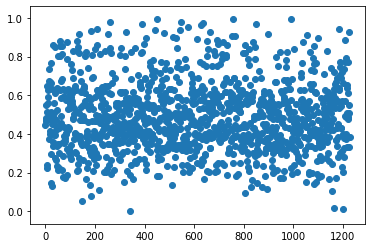

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,1228)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

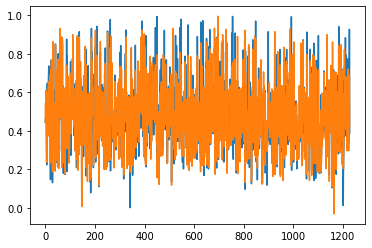

In [22]:
fig, ax = plt.subplots()
ax.plot(x_range,actuals)
ax.plot(x_range,predictions)


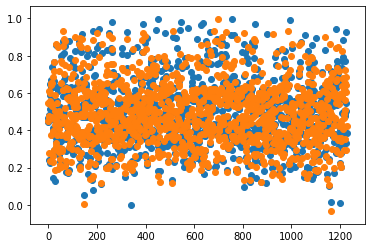

In [23]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)


In [24]:
#r2 and mse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f'Mean squared error: {mse.round(3)} \nr2: {r2.round(3)}')

Mean squared error: 0.006 
r2: 0.815


In [25]:
X_train

,YrBlt,Beds,FBths,LvngAreaSF,HBths,Days On Market,Garage,Sold Price/List Price,Sub#
4754,0.978261,0.500,0.500,0.654139,0.2,0.005731,0.500000,0.367647,0.677536
1931,0.989130,0.375,0.375,0.314203,0.2,0.000000,0.333333,0.352941,0.597826
1002,0.989130,0.250,0.375,0.276621,0.2,0.000000,0.166667,0.367647,0.851449
3959,1.000000,0.500,0.625,0.538852,0.0,0.000000,0.333333,0.367647,0.561594
3461,0.885870,0.375,0.250,0.387845,0.2,0.100287,0.333333,0.367647,0.003623
...,...,...,...,...,...,...,...,...,...
966,0.820652,0.250,0.250,0.309125,0.4,0.223496,0.333333,0.367647,0.090580
3398,0.989130,0.375,0.375,0.501608,0.0,0.000000,0.333333,0.367647,0.246377
2060,0.956522,0.250,0.250,0.307601,0.2,0.002865,0.333333,0.367647,0.039855
2287,0.983696,0.500,0.500,0.393432,0.0,0.000000,0.333333,0.367647,0.311594


In [26]:
#["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]
test_input = [1980, 4 , 3, 1500, 0, 10, 1, 1, 193]



#normalize inputs
test_input_normal = (test_input-x_min)/(x_max-x_min)
#convert to tf array
array = tf.reshape(test_input_normal, [-1,9])
print(array)
print('____________________')


#run model
output = model.predict(array)
print(output)
print('____________________')


#unnormalize for final reports
Normal_output = output*(y_max-y_min)+y_min
Normal_output

tf.Tensor(
[[0.7826087  0.375      0.375      0.17267649 0.         0.0286533
  0.16666667 0.36764706 0.69927536]], shape=(1, 9), dtype=float64)
____________________
[[0.23924255]]
____________________


array([[261359.8]], dtype=float32)

In [28]:
#save model
model.save("home_price_prediction.h5")